# Test the effects of time window lengths on the frequency resolution of multitaper spectral analysis

In [54]:
# Import modules
from os.path import join
from obspy import read, UTCDateTime
from numpy import amax, abs, sqrt
from pandas import DataFrame, Timedelta, Timestamp
from matplotlib.pyplot import subplots

from utils_basic import ROOTDIR
from utils_cc import get_timewin_from_template_name
from utils_preproc import read_and_process_windowed_waveforms
from utils_snuffler import read_normal_markers
from utils_spec import get_data_spectrum, get_data_psd, get_filter_response

from multitaper import MTSpec

In [55]:
# Inputs
## Time windows and stations
station = "B03"
evname = "BeatB16-08-06-34"
phase = "X"

length_twin1 = 0.2
length_twin2 = 0.4
length_twin3 = 0.8

center = 0.05

## Parameters for the multitaper analysis
nw = 2

## Filtering paramgters
freqmin = 10.0
freqmax = 450.0

## Plotting parameters
linewidth_wf = 1.0
linewidth_psd = 1.5

freqmin_plot = 10.0
freqmax_plot = 450.0

## Scale factors for plotting the PSDs
scale_wf = 1.05
scale_psd = 3.0

psdmin = 1e-2

fontsize_title = 15
fontsize_annot = 15

In [56]:
# Read the snuffler pick file
timewin = get_timewin_from_template_name(evname)
pickdf = read_normal_markers(join(ROOTDIR, timewin, f"{phase.lower()}picks_{evname}.dat"))

In [57]:
# Read and process the data
begin1 = center-length_twin1/2
end1 = center+length_twin1/2

begin2 = center-length_twin2/2
end2 = center+length_twin2/2

begin3 = center-length_twin3/2
end3 = center+length_twin3/2

stream1 = read_and_process_windowed_waveforms(pickdf, freqmin, freqmax, begin=begin1, end=end1, stations=[station])
stream2 = read_and_process_windowed_waveforms(pickdf, freqmin, freqmax, begin=begin2, end=end2, stations=[station])
stream3 = read_and_process_windowed_waveforms(pickdf, freqmin, freqmax, begin=begin3, end=end3, stations=[station])

B03
B03
B03


In [58]:
# Compute the spectra

## Get the traces

### For the first time window

trace1_z = stream1.select(station=station, component="Z")[0]
trace1_1 = stream1.select(station=station, component="1")[0]
trace1_2 = stream1.select(station=station, component="2")[0]

data1_z = trace1_z.data
data1_1 = trace1_1.data
data1_2 = trace1_2.data

samprat = trace1_z.stats.sampling_rate
sampint = trace1_z.stats.delta

spec1_z = MTSpec(data1_z, nw=nw, dt=sampint)
spec1_1 = MTSpec(data1_1, nw=nw, dt=sampint)
spec1_2 = MTSpec(data1_2, nw=nw, dt=sampint)

freqax1, psd1_z = spec1_z.rspec()
freqax1 = freqax1[:, 0]
_, psd1_1 = spec1_1.rspec()
_, psd1_2 = spec1_2.rspec()

confint1_z = spec1_z.jackspec()
confint1_1 = spec1_1.jackspec()
confint1_2 = spec1_2.jackspec()

_, confint1_z = spec1_z.rspec(confint1_z)
_, confint1_1 = spec1_1.rspec(confint1_1)
_, confint1_2 = spec1_2.rspec(confint1_2)

### For the second time window

trace2_z = stream2.select(station=station, component="Z")[0]
trace2_1 = stream2.select(station=station, component="1")[0]
trace2_2 = stream2.select(station=station, component="2")[0]

data2_z = trace2_z.data
data2_1 = trace2_1.data
data2_2 = trace2_2.data

spec2_z = MTSpec(data2_z, nw=nw, dt=sampint)
spec2_1 = MTSpec(data2_1, nw=nw, dt=sampint)
spec2_2 = MTSpec(data2_2, nw=nw, dt=sampint)

freqax2, psd2_z = spec2_z.rspec()
freqax2 = freqax2[:, 0]
_, psd2_1 = spec2_1.rspec()
_, psd2_2 = spec2_2.rspec()

confint2_z = spec2_z.jackspec()
confint2_1 = spec2_1.jackspec()
confint2_2 = spec2_2.jackspec()

_, confint2_z = spec2_z.rspec(confint2_z)
_, confint2_1 = spec2_1.rspec(confint2_1)
_, confint2_2 = spec2_2.rspec(confint2_2)

### For the third time window

trace3_z = stream3.select(station=station, component="Z")[0]
trace3_1 = stream3.select(station=station, component="1")[0]
trace3_2 = stream3.select(station=station, component="2")[0]

data3_z = trace3_z.data
data3_1 = trace3_1.data
data3_2 = trace3_2.data

spec3_z = MTSpec(data3_z, nw=nw, dt=sampint)
spec3_1 = MTSpec(data3_1, nw=nw, dt=sampint)
spec3_2 = MTSpec(data3_2, nw=nw, dt=sampint)

freqax3, psd3_z = spec3_z.rspec()
freqax3 = freqax3[:, 0]
_, psd3_1 = spec3_1.rspec()
_, psd3_2 = spec3_2.rspec()

confint3_z = spec3_z.jackspec()
confint3_1 = spec3_1.jackspec()
confint3_2 = spec3_2.jackspec()

_, confint3_z = spec3_z.rspec(confint3_z)
_, confint3_1 = spec3_1.rspec(confint3_1)
_, confint3_2 = spec3_2.rspec(confint3_2)


Saved the figure to /Volumes/OmanData/geophones_no_prefilt/data/2020-01-16-08-00-00/multitaper_time_window_length_compare_BeatB16-08-06-34_B03.png


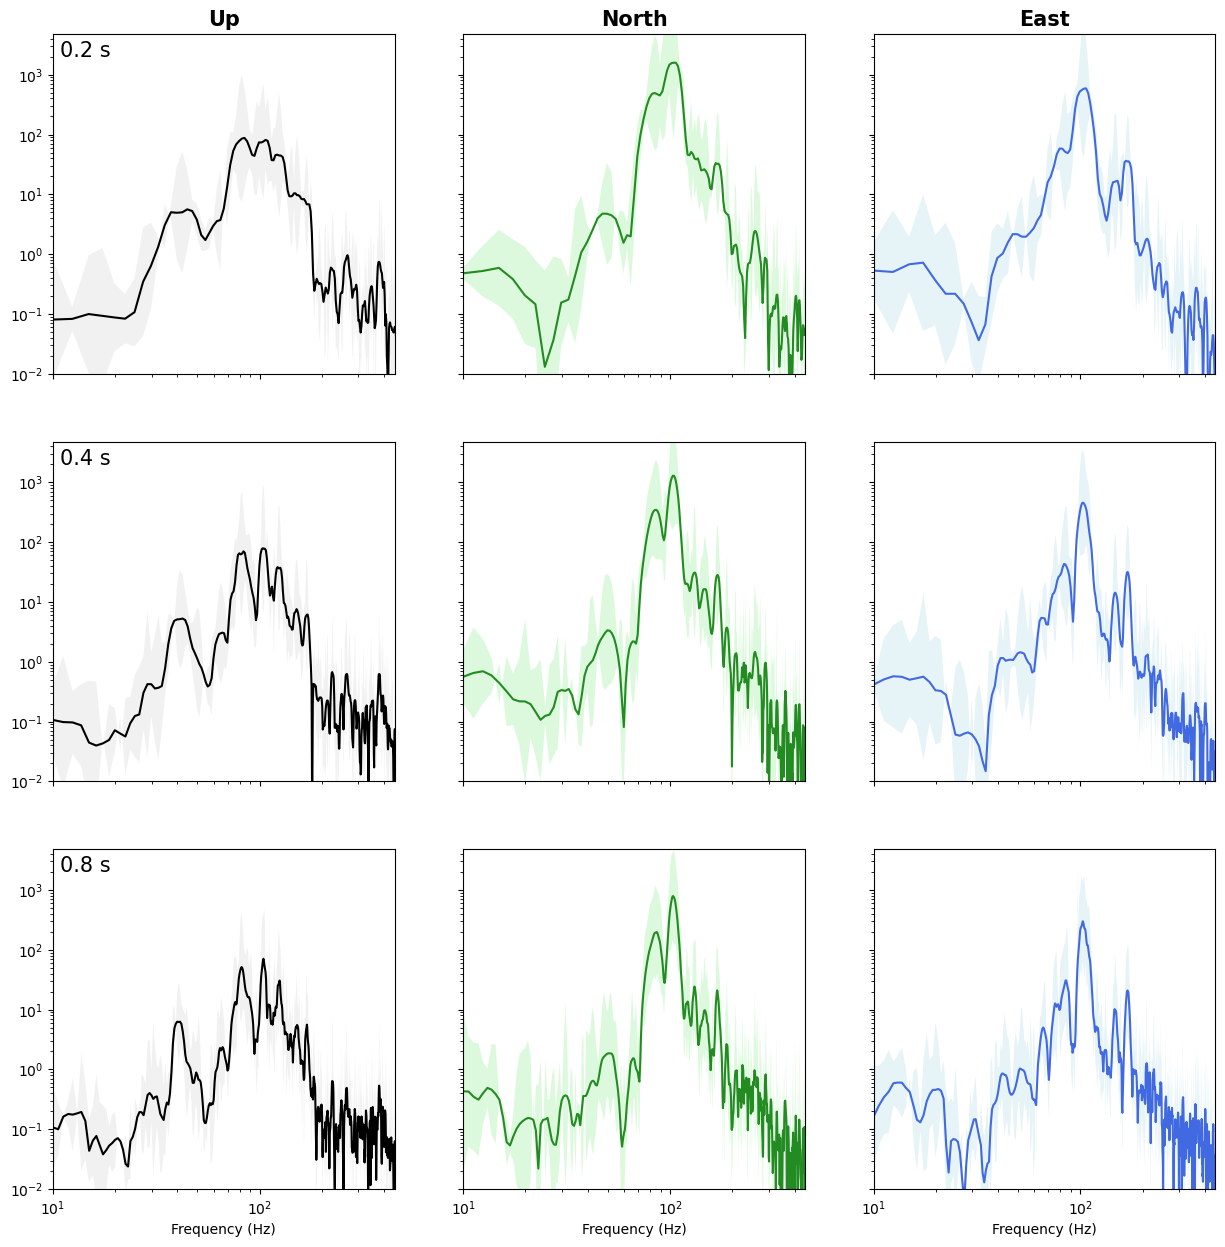

In [59]:
# Plot the comparison between different time-window lengths

## Plot the spectra
psdmax = amax([amax(psd1_z), amax(psd1_1), amax(psd1_2), amax(psd2_z), amax(psd2_1), amax(psd2_2), amax(psd3_z), amax(psd3_1), amax(psd3_2)])

fig, axes = subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)

### The first time window
axes[0, 0].loglog(freqax1, psd1_z, color="black", linewidth=linewidth_psd)
axes[0, 1].loglog(freqax1, psd1_1, color="forestgreen", linewidth=linewidth_psd)
axes[0, 2].loglog(freqax1, psd1_2, color="royalblue", linewidth=linewidth_psd)

axes[0, 0].fill_between(freqax1, confint1_z[:, 0], confint1_z[:, 1], color="lightgray", alpha=0.3, edgecolor="none")
axes[0, 1].fill_between(freqax1, confint1_1[:, 0], confint1_1[:, 1], color="lightgreen", alpha=0.3, edgecolor="none")
axes[0, 2].fill_between(freqax1, confint1_2[:, 0], confint1_2[:, 1], color="lightblue", alpha=0.3, edgecolor="none")

axes[0, 0].text(0.02, 0.98, f"{length_twin1} s", fontsize=fontsize_annot, transform=axes[0, 0].transAxes, ha="left", va="top")

axes[0, 0].set_title("Up", fontsize=fontsize_title, fontweight="bold")
axes[0, 1].set_title("North", fontsize=fontsize_title, fontweight="bold")
axes[0, 2].set_title("East", fontsize=fontsize_title, fontweight="bold")

### The second time window
axes[1, 0].loglog(freqax2, psd2_z, color="black", linewidth=linewidth_psd)
axes[1, 1].loglog(freqax2, psd2_1, color="forestgreen", linewidth=linewidth_psd)
axes[1, 2].loglog(freqax2, psd2_2, color="royalblue", linewidth=linewidth_psd)

axes[1, 0].fill_between(freqax2, confint2_z[:, 0], confint2_z[:, 1], color="lightgray", alpha=0.3, edgecolor="none")
axes[1, 1].fill_between(freqax2, confint2_1[:, 0], confint2_1[:, 1], color="lightgreen", alpha=0.3, edgecolor="none")
axes[1, 2].fill_between(freqax2, confint2_2[:, 0], confint2_2[:, 1], color="lightblue", alpha=0.3, edgecolor="none")

axes[1, 0].text(0.02, 0.98, f"{length_twin2} s", fontsize=fontsize_annot, transform=axes[1, 0].transAxes, ha="left", va="top")

### The third time window
axes[2, 0].loglog(freqax3, psd3_z, color="black", linewidth=linewidth_psd)
axes[2, 1].loglog(freqax3, psd3_1, color="forestgreen", linewidth=linewidth_psd)
axes[2, 2].loglog(freqax3, psd3_2, color="royalblue", linewidth=linewidth_psd)

axes[2, 0].fill_between(freqax3, confint3_z[:, 0], confint3_z[:, 1], color="lightgray", alpha=0.3, edgecolor="none")
axes[2, 1].fill_between(freqax3, confint3_1[:, 0], confint3_1[:, 1], color="lightgreen", alpha=0.3, edgecolor="none")
axes[2, 2].fill_between(freqax3, confint3_2[:, 0], confint3_2[:, 1], color="lightblue", alpha=0.3, edgecolor="none")

axes[2, 0].text(0.02, 0.98, f"{length_twin3} s", fontsize=fontsize_annot, transform=axes[2, 0].transAxes, ha="left", va="top")

for i in range(3):
    axes[2, i].set_xlim(freqmin_plot, freqmax_plot)
    axes[2, i].set_ylim(psdmin, scale_psd*psdmax)
    axes[2, i].set_xlabel("Frequency (Hz)")


# Save the figure
fig.patch.set_alpha(0.0)

outpath = join(ROOTDIR, timewin, f"multitaper_time_window_length_compare_{evname}_{station}.png")
fig.savefig(outpath, dpi=300)
print(f"Saved the figure to {outpath}")
